In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold,LeaveOneOut, cross_val_score
pd.options.display.float_format = "{:,.2f}".format
import sys
sys.path.append("../")
from src import soporte_ajuste as sa

In [47]:
df = pd.read_csv('../data/Global_Superstore_clustering.csv', encoding='ISO-8859-1', index_col=0)
df.head(2)

df1 = df[df["clusters_kmeans"] == 0]
print(df1.shape[0])
df2 = df[df["clusters_kmeans"] == 1]
print(df2.shape[0])
df3 = df[df["clusters_kmeans"] == 2]
print(df3.shape[0])
df1 = df1.drop(columns=["clusters_kmeans","clusters_agglomerative"])
df1.columns

38215
2429
10646


Index(['Ship Mode', 'Segment', 'City', 'State', 'Country', 'Market', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Shipping Cost', 'Order Priority',
       'Profit_respuesta'],
      dtype='object')

In [48]:
# instanciamos la clase de regresión lineal
analisis = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_respuesta')

params_arbol = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 50, 100, 200],
    'min_samples_leaf': [10, 50, 100, 200],
    'max_leaf_nodes': [4, 6, 8, 10, 20, 30]
}

# llamamos a la función para ajustar el modelo
analisis.ajustar_modelo(modelo='tree', param_grid=params_arbol, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = analisis.obtener_resultados()
df_resultados.sample(3)

,Real,Predicho,Conjunto,Modelo,Residuos
17807,24.12,16.10,Train,tree,8.02
10633,120.48,105.44,Train,tree,15.04
46232,4.27,5.90,Train,tree,-1.64


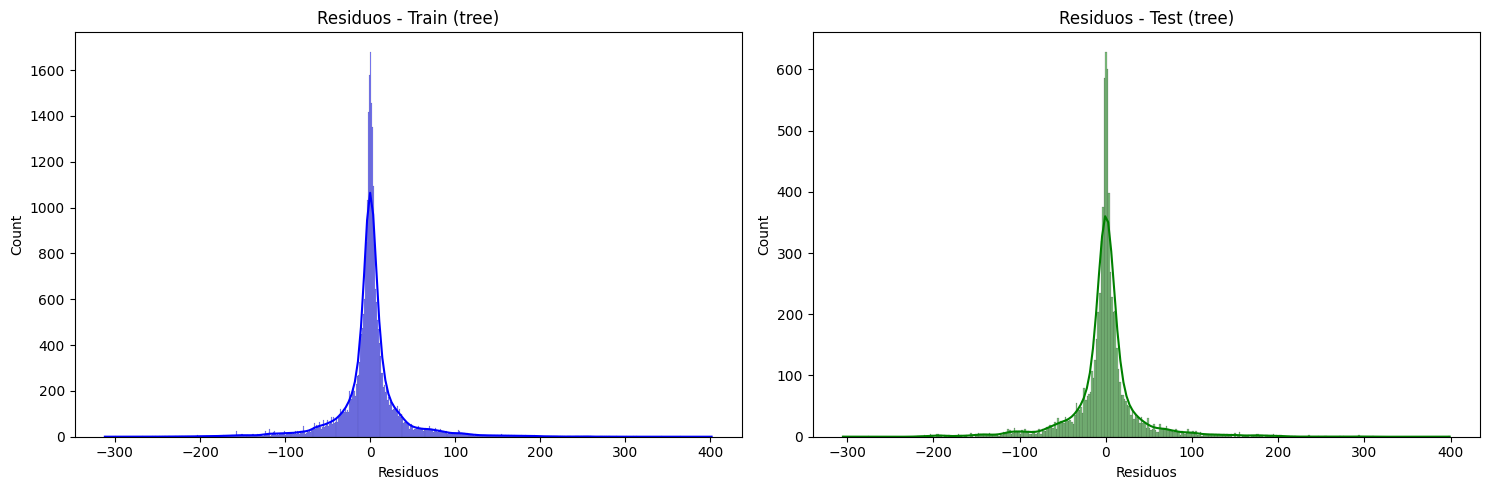

In [49]:
analisis.plot_residuos("tree")

In [50]:
analisis.calcular_metricas("tree")

,train,test
R2,0.52,0.48
MAE,21.95,23.03
MSE,"1,609.06","1,817.98"
RMSE,40.11,42.64


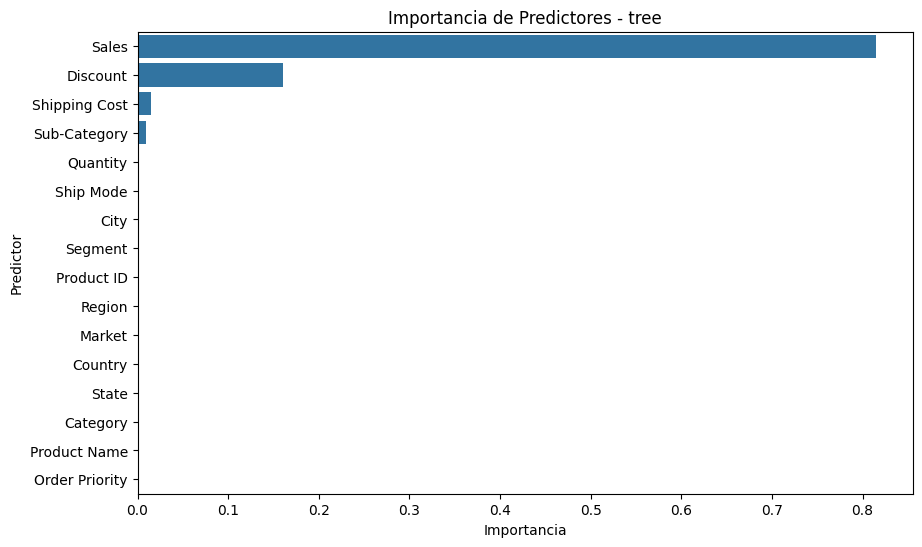

,Predictor,Importancia
11,Sales,0.81
13,Discount,0.16
14,Shipping Cost,0.01
9,Sub-Category,0.01
12,Quantity,0.00
0,Ship Mode,0.00
2,City,0.00
1,Segment,0.00
7,Product ID,0.00
6,Region,0.00


In [51]:
analisis.importancia_predictores("tree")

In [52]:
# instanciamos la clase de regresión lineal
analisis_random_forest = sa.AnalisisModelosRegresion(dataframe=df1, variable_dependiente='Profit_respuesta')

params_rf = {
    'n_estimators': [100],
    'max_depth': [5],
    'min_samples_split': [10],
    'min_samples_leaf': [1], 
    'max_leaf_nodes': [30]
}

# llamamos a la función para ajustar el modelo
analisis_random_forest.ajustar_modelo(modelo='random_forest', scoring="neg_mean_squared_error", param_grid=params_rf)

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_analisis_random_forest = analisis_random_forest.obtener_resultados()
df_resultados_analisis_random_forest.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
46220,6.84,3.82,Train,random_forest,3.02
22412,55.62,32.66,Train,random_forest,22.96
42616,8.80,5.03,Train,random_forest,3.77


In [53]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.53,0.49
MAE,21.81,22.85
MSE,"1,575.96","1,781.28"
RMSE,39.70,42.21


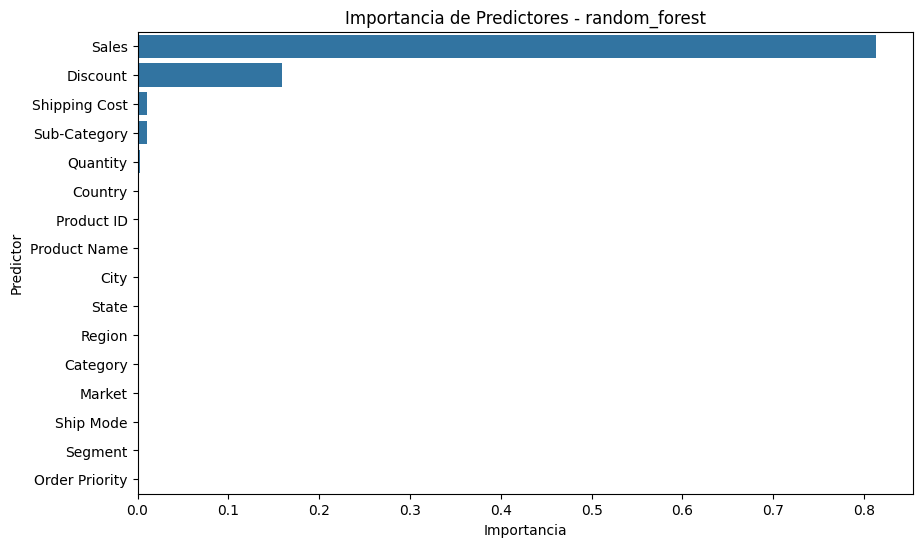

,Predictor,Importancia
11,Sales,0.81
13,Discount,0.16
14,Shipping Cost,0.01
9,Sub-Category,0.01
12,Quantity,0.00
4,Country,0.00
7,Product ID,0.00
10,Product Name,0.00
2,City,0.00
3,State,0.00


In [54]:
analisis_random_forest.importancia_predictores("random_forest")

In [55]:
# instanciamos la clase de regresión lineal
analisis_gradient_boosting = sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Profit_respuesta')

# params_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

params_gb = {
    'n_estimators': [50],
    'learning_rate': [0.01],
    'max_depth': [3],
    'min_samples_split': [2],
    'min_samples_leaf': [1,]
}

# llamamos a la función para ajustar el modelo
analisis_gradient_boosting.ajustar_modelo(modelo='gradient_boosting',param_grid = params_gb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient_boosting = analisis_gradient_boosting.obtener_resultados()
df_resultados_gradient_boosting.head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
2558,-472.57,-216.08,Train,gradient_boosting,-256.49
15041,109.89,30.75,Train,gradient_boosting,79.14
38072,1.56,29.33,Train,gradient_boosting,-27.77


In [56]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.39,0.33
MAE,53.92,54.63
MSE,"18,735.81","19,950.75"
RMSE,136.88,141.25


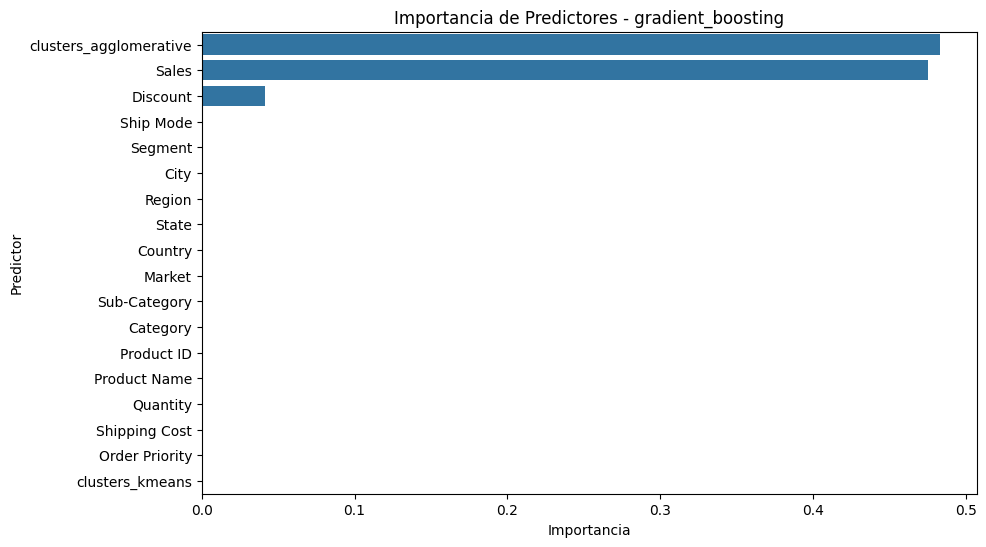

,Predictor,Importancia
17,clusters_agglomerative,0.48
11,Sales,0.48
13,Discount,0.04
0,Ship Mode,0.00
1,Segment,0.00
2,City,0.00
6,Region,0.00
3,State,0.00
4,Country,0.00
5,Market,0.00


In [57]:
analisis_gradient_boosting.importancia_predictores("gradient_boosting")

In [58]:
# instanciamos la clase de regresión lineal
analisis_xgboost= sa.AnalisisModelosRegresion(dataframe=df, variable_dependiente='Profit_respuesta')

params_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 4],  # Equivalente a min_samples_leaf
    'subsample': [0.8, 1.0],        # Para evitar sobreajuste
    'colsample_bytree': [0.8, 1.0]  # Selección de columnas al construir cada árbol
}

# llamamos a la función para ajustar el modelo
analisis_xgboost.ajustar_modelo(modelo='xgboost',param_grid=params_xgb, scoring="neg_mean_squared_error")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = analisis_xgboost.obtener_resultados()
df_resultados_xgboost.head(3)

d:\develop\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


,Real,Predicho,Conjunto,Modelo,Residuos
2558,-472.57,-542.32,Train,xgboost,69.75
15041,109.89,58.81,Train,xgboost,51.08
38072,1.56,6.35,Train,xgboost,-4.79


In [59]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.89,0.67
MAE,28.73,35.17
MSE,"3,284.52","9,750.34"
RMSE,57.31,98.74


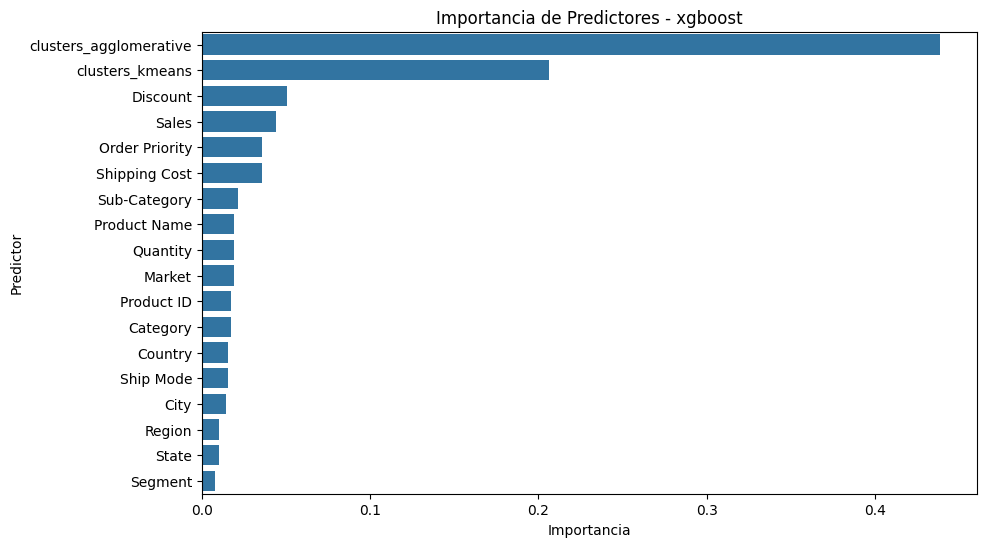

,Predictor,Importancia
17,clusters_agglomerative,0.44
16,clusters_kmeans,0.21
13,Discount,0.05
11,Sales,0.04
15,Order Priority,0.04
14,Shipping Cost,0.04
9,Sub-Category,0.02
10,Product Name,0.02
12,Quantity,0.02
5,Market,0.02


In [60]:
analisis_xgboost.importancia_predictores("xgboost")

In [61]:
analisis.calcular_metricas("tree")

,train,test
R2,0.52,0.48
MAE,21.95,23.03
MSE,"1,609.06","1,817.98"
RMSE,40.11,42.64


In [62]:
analisis_xgboost.calcular_metricas("xgboost")

,train,test
R2,0.89,0.67
MAE,28.73,35.17
MSE,"3,284.52","9,750.34"
RMSE,57.31,98.74


In [63]:
analisis_gradient_boosting.calcular_metricas("gradient_boosting")

,train,test
R2,0.39,0.33
MAE,53.92,54.63
MSE,"18,735.81","19,950.75"
RMSE,136.88,141.25


In [64]:
analisis_random_forest.calcular_metricas("random_forest")

,train,test
R2,0.53,0.49
MAE,21.81,22.85
MSE,"1,575.96","1,781.28"
RMSE,39.70,42.21


In [65]:
analisis_random_forest.obtener_resultados().head(3)

,Real,Predicho,Conjunto,Modelo,Residuos
46220,6.84,3.82,Train,random_forest,3.02
22412,55.62,32.66,Train,random_forest,22.96
42616,8.80,5.03,Train,random_forest,3.77
